# Creating Spatial Data

A common operation in spatial analysis is to take non-spatial data, such as CSV files, and creating a spatial dataset from it using coordinate information contained in the file. GeoPandas provides a convenient way to take data from a delimited-text file, create geometry and write the results as a spatial dataset.

We will read a tab-delimited file of places, filter it to a feature class, create a GeoDataFrame and export it as a GeoPackage file.

![](images/python_foundation/geonames_mountains.png)

In [1]:
import os
import pandas as pd
import geopandas as gpd

In [2]:
data_pkg_path = 'data/geonames/'
filename = 'US.txt'
path = os.path.join(data_pkg_path, filename)

## Reading Tab-Delimited Files

The source data comes from [GeoNames](https://en.wikipedia.org/wiki/GeoNames) - a free and open database of geographic names of the world. It is a huge database containing millions of records per country. The data is distributed as country-level text files in a tab-delimited format. The files do not contain a header row with column names, so we need to specify them when reading the data. The data format is described in detail on the [Data Export](https://www.geonames.org/export/) page.

We specify the separator as **\\t** (tab) as an argument to the `read_csv()` method. Note that the file for USA has more than 2M records.

In [3]:
column_names = [
    'geonameid', 'name', 'asciiname', 'alternatenames', 
    'latitude', 'longitude', 'feature class', 'feature code',
    'country code', 'cc2', 'admin1 code', 'admin2 code',
    'admin3 code', 'admin4 code', 'population', 'elevation',
    'dem', 'timezone', 'modification date'
]

df = pd.read_csv(path, sep='\t', names=column_names)
print(df.info())

C:\Users\PETBUser\AppData\Local\Temp\ipykernel_4324\1686100402.py:9: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t', names=column_names)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237861 entries, 0 to 2237860
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   geonameid          int64  
 1   name               object 
 2   asciiname          object 
 3   alternatenames     object 
 4   latitude           float64
 5   longitude          float64
 6   feature class      object 
 7   feature code       object 
 8   country code       object 
 9   cc2                object 
 10  admin1 code        object 
 11  admin2 code        object 
 12  admin3 code        float64
 13  admin4 code        float64
 14  population         int64  
 15  elevation          float64
 16  dem                int64  
 17  timezone           object 
 18  modification date  object 
dtypes: float64(5), int64(3), object(11)
memory usage: 324.4+ MB
None


## Filtering Data

The input data has a column `feature_class` categorizing the place into [9 feature classes](https://www.geonames.org/export/codes.html). We can select all rows with the value `T` with the category  *mountain,hill,rock...*

In [4]:
mountains = df[df['feature class']=='T']
print(mountains.head()[['name', 'latitude', 'longitude', 'dem','feature class']])

                 name  latitude  longitude   dem feature class
15       Vulcan Point  52.10222  177.53889 -9999             T
16     Tropical Ridge  51.99167  177.50833   267             T
17  Thirty-Seven Hill  52.84528  173.15278   193             T
20       Square Point  52.86120  173.33679    30             T
21       Square Bluff  51.65000  178.70000 -9999             T


## Creating Geometries

GeoPandas has a conveinent function `points_from_xy()` that creates a Geometry column from X and Y coordinates. We can then take a Pandas dataframe and create a GeoDataFrame by specifying a CRS and the geometry column.

In [5]:
geometry = gpd.points_from_xy(mountains.longitude, mountains.latitude)
gdf = gpd.GeoDataFrame(mountains, crs='EPSG:4326', geometry=geometry)
print(gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 225328 entries, 15 to 2237836
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   geonameid          225328 non-null  int64   
 1   name               225328 non-null  object  
 2   asciiname          225328 non-null  object  
 3   alternatenames     30933 non-null   object  
 4   latitude           225328 non-null  float64 
 5   longitude          225328 non-null  float64 
 6   feature class      225328 non-null  object  
 7   feature code       225328 non-null  object  
 8   country code       225328 non-null  object  
 9   cc2                5 non-null       object  
 10  admin1 code        225327 non-null  object  
 11  admin2 code        225170 non-null  object  
 12  admin3 code        21646 non-null   float64 
 13  admin4 code        0 non-null       float64 
 14  population         225328 non-null  int64   
 15  elevation          224417 non

## Writing Files

We can write the resulting GeoDataFrame to any of the supported vector data format. Here we are writing it as a new GeoPackage file.

You can open the resulting geopackage in a GIS and view the data.

In [6]:
output_dir = 'output'
output_filename = 'mountains.gpkg'
output_path = os.path.join(output_dir, output_filename)

gdf.to_file(driver='GPKG', filename=output_path, encoding='utf-8')
print('Successfully written output file at {}'.format(output_path))

Successfully written output file at output\mountains.gpkg


In [25]:
gdf2 = gdf[(gdf['longitude'] > -150) & (gdf['longitude'] < -50)]
print(gdf2.info())
print()
print(gdf2.geom_type)
print()
print(gdf2.crs)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 216180 entries, 823 to 2237836
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   geonameid          216180 non-null  int64   
 1   name               216180 non-null  object  
 2   asciiname          216180 non-null  object  
 3   alternatenames     26776 non-null   object  
 4   latitude           216180 non-null  float64 
 5   longitude          216180 non-null  float64 
 6   feature class      216180 non-null  object  
 7   feature code       216180 non-null  object  
 8   country code       216180 non-null  object  
 9   cc2                5 non-null       object  
 10  admin1 code        216179 non-null  object  
 11  admin2 code        216056 non-null  object  
 12  admin3 code        21646 non-null   float64 
 13  admin4 code        0 non-null       float64 
 14  population         216180 non-null  int64   
 15  elevation          215870 no

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 216180 entries, 823 to 2237836
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   geonameid          216180 non-null  int64   
 1   name               216180 non-null  object  
 2   asciiname          216180 non-null  object  
 3   alternatenames     26776 non-null   object  
 4   latitude           216180 non-null  float64 
 5   longitude          216180 non-null  float64 
 6   feature class      216180 non-null  object  
 7   feature code       216180 non-null  object  
 8   country code       216180 non-null  object  
 9   cc2                5 non-null       object  
 10  admin1 code        216179 non-null  object  
 11  admin2 code        216056 non-null  object  
 12  admin3 code        21646 non-null   float64 
 13  admin4 code        0 non-null       float64 
 14  population         216180 non-null  int64   
 15  elevation          215870 no

<Axes: >

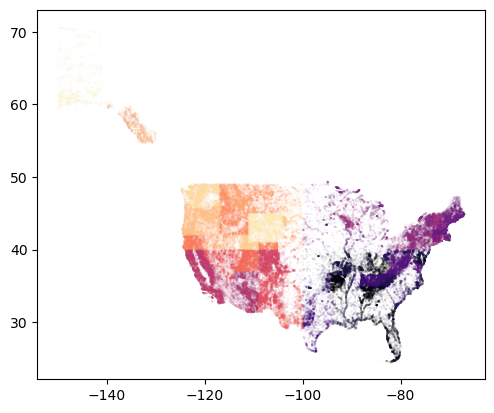

In [21]:
# Plot it
gdf2.plot(markersize=0.0005, cmap='magma', legend=True)

## Exercise

The data package contains multiple geonames text files from different countries in the `geonames/` folder. Write code to read all the files, merge them and extract the mountain features to a single geopackage.

- Example Workflow:
    - 1. Create an empty list called `dataframes`
    - 2. Iterate over the filenames and within the loop
        - a. Construct the path to the file
        - b. Read it using pandas
        - c. Filter it for the mountain features
        - d. Append to the list `dataframes`. 
    - Use pd.concat() function to merge the list of dataframes.
    - Create a GeoDataFrame
    - Write the GeoDataFrame to a file.

In [ ]:
import os
import pandas as pd
import geopandas as gpd

data_pkg_path = 'data/geonames/'
files = os.listdir(data_pkg_path)

for file in files:
    print(file)

----